# Readme
This notebook ... MASTERS INFO HERE

# Setup

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from scipy.stats import chi2_contingency # chisquare

## Constants

In [3]:
FN_IN = r"C:\Users\jaimi\OneDrive\Desktop\wgu\D214\LLMAnalyticsAccuracy\data\llm_accuracy.csv"

# Load Data

In [4]:
df_load = pd.read_csv(FN_IN)

In [5]:
df_load.head()

,Unnamed: 0,test_type,sql_query,sql_result,llm_user_query,llm_sql_query,llm_result,correct_result
0,0,last_update,SELECT last_update FROM dw_financial_instituti...,1990-10-04 00:00:00,What was the last update for The Southington B...,"SELECT ""last_update"" FROM dw_financial_institu...",1990-10-04 00:00:00,1
1,1,join_max,SELECT max(total_assets) FROM dw_financial_ins...,NaN,What is the maximum total assets The Southingt...,SELECT MAX(total_assets) FROM dw_financial_ins...,NaN,1
2,2,last_update,SELECT last_update FROM dw_financial_instituti...,1995-10-06 00:00:00,What was the last update for Bank of New Engla...,SELECT dw_financial_institution_profiles.last_...,1995-10-06 00:00:00,1
3,3,join_max,SELECT max(total_assets) FROM dw_financial_ins...,153274,What is the maximum total assets Bank of New E...,SELECT MAX(total_assets) FROM dw_financial_ins...,NaN,0
4,4,last_update,SELECT last_update FROM dw_financial_instituti...,2000-03-29 00:00:00,"What was the last update for SunTrust Bank, Ta...",SELECT dw_financial_institution_profiles.last_...,NaN,0


In [6]:
df_load.shape

(8000, 8)

# Chi-Square

## Contingency Table

In [7]:
df_crosstab = pd.crosstab(
    df_load['test_type'], 
    df_load['correct_result']
)


In [8]:
df_crosstab

correct_result,0,1
test_type,,
join_max,3052,948
last_update,96,3904


In [9]:
res= chi2_contingency(df_crosstab)

In [10]:
res

Chi2ContingencyResult(statistic=4573.507983713079, pvalue=0.0, dof=1, expected_freq=array([[1574., 2426.],
       [1574., 2426.]]))

In [11]:
df_crosstab_norm = pd.crosstab(
    df_load['test_type'], 
    df_load['correct_result'], 
    normalize = 'index'
)

In [12]:
df_crosstab_norm

correct_result,0,1
test_type,,
join_max,0.763,0.237
last_update,0.024,0.976


<Axes: xlabel='correct_result', ylabel='test_type'>

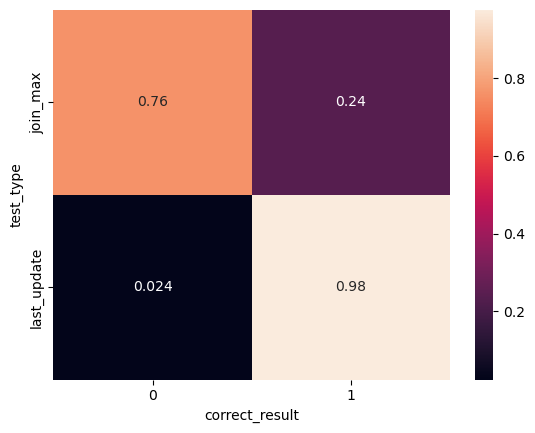

In [13]:
sns.heatmap(df_crosstab_norm, annot = True)